<a href="https://colab.research.google.com/github/venkat2020-github/DeepLearning/blob/main/3_5_Classifying_newswires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3.5.1 The Reuters dataset

In [4]:
#Listing 3.12 Loading the Reuters dataset
from keras import models
from keras import layers
from keras.datasets import reuters

In [5]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [6]:
len(train_data)

8982

In [7]:
len(test_data)

2246

In [8]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [9]:
train_labels[10]

3

In [14]:
#Encoding the data
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

In [16]:
x_train = vectorize_sequences(train_data) #Vectorized training data
x_test = vectorize_sequences(test_data) #Vectorized test data

In [19]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1
  return results

In [20]:
one_hot_train_labels = to_one_hot(train_labels) #Vectorized training labels
one_hot_test_labels = to_one_hot(test_labels) #Vectorized test labels

In [22]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_teste_labels = to_categorical(test_labels)

In [23]:
#Model definition
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [24]:
#Compiling the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
#Validating your approach
x_val = x_train[:1000]
partial_x_train=x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [26]:
#Training the model
history = model.fit(partial_x_train, partial_y_train, epochs=20,batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 66ms/step - loss: 2.6773 - accuracy: 0.5123 - val_loss: 1.7582 - val_accuracy: 0.6570
Epoch 2/20
16/16 [==============================] - 1s 53ms/step - loss: 1.4409 - accuracy: 0.7081 - val_loss: 1.2913 - val_accuracy: 0.7140
Epoch 3/20
16/16 [==============================] - 1s 52ms/step - loss: 1.0583 - accuracy: 0.7765 - val_loss: 1.1133 - val_accuracy: 0.7640
Epoch 4/20
16/16 [==============================] - 1s 53ms/step - loss: 0.8211 - accuracy: 0.8314 - val_loss: 1.0233 - val_accuracy: 0.7890
Epoch 5/20
16/16 [==============================] - 1s 52ms/step - loss: 0.6476 - accuracy: 0.8664 - val_loss: 0.9394 - val_accuracy: 0.8100
Epoch 6/20
16/16 [==============================] - 1s 53ms/step - loss: 0.5176 - accuracy: 0.8936 - val_loss: 0.9099 - val_accuracy: 0.8130
Epoch 7/20
16/16 [==============================] - 1s 54ms/step - loss: 0.4166 - accuracy: 0.9134 - val_loss: 0.8727 - val_accuracy: 0.8180
Epoch 8/20
16

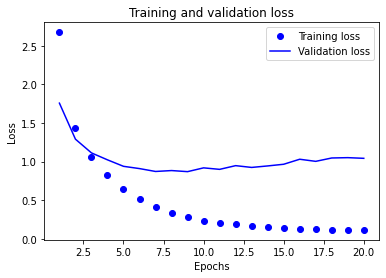

In [32]:
#Plotting the training and validation loss
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) +1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

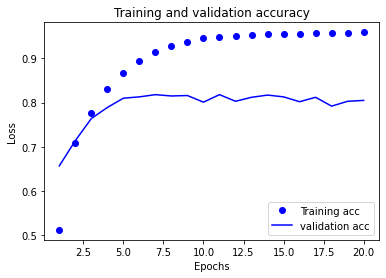

In [35]:
#Plotting the training and validation accuracy
plt.clf() #Clears the figure

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [36]:
#Retraining a model from scratch
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 2s 63ms/step - loss: 2.5849 - accuracy: 0.5281 - val_loss: 1.6518 - val_accuracy: 0.6530
Epoch 2/9
16/16 [==============================] - 1s 51ms/step - loss: 1.3860 - accuracy: 0.7156 - val_loss: 1.2787 - val_accuracy: 0.7220
Epoch 3/9
16/16 [==============================] - 1s 52ms/step - loss: 1.0491 - accuracy: 0.7769 - val_loss: 1.1195 - val_accuracy: 0.7610
Epoch 4/9
16/16 [==============================] - 1s 50ms/step - loss: 0.8245 - accuracy: 0.8259 - val_loss: 1.0328 - val_accuracy: 0.7760
Epoch 5/9
16/16 [==============================] - 1s 52ms/step - loss: 0.6606 - accuracy: 0.8622 - val_loss: 0.9704 - val_accuracy: 0.8060
Epoch 6/9
16/16 [==============================] - 1s 50ms/step - loss: 0.5325 - accuracy: 0.8871 - val_loss: 0.9301 - val_accuracy: 0.8080
Epoch 7/9
16/16 [==============================] - 1s 50ms/step - loss: 0.4297 - accuracy: 0.9070 - val_loss: 0.8840 - val_accuracy: 0.8190
Epoch 8/9
16/16 [===

In [37]:
results

[0.9817447662353516, 0.7889581322669983]

In [40]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.20302760463045413

In [41]:
#Generating prediction for new data
predictions = model.predict(x_test)
predictions.shape

(2246, 46)

In [42]:
np.sum(predictions[0])

1.0

In [43]:
np.argmax(predictions[0])

3

In [44]:
y_train=np.array(train_labels)
y_test=np.array(test_labels)

In [45]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [47]:
# Model with an information bottleneck
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 22ms/step - loss: 1.8812 - accuracy: 0.6233 - val_loss: 1.2736 - val_accuracy: 0.7090
Epoch 2/20
63/63 [==============================] - 1s 19ms/step - loss: 0.9833 - accuracy: 0.7824 - val_loss: 1.0016 - val_accuracy: 0.7890
Epoch 3/20
63/63 [==============================] - 1s 19ms/step - loss: 0.6552 - accuracy: 0.8607 - val_loss: 0.9441 - val_accuracy: 0.7920
Epoch 4/20
63/63 [==============================] - 1s 19ms/step - loss: 0.4555 - accuracy: 0.9029 - val_loss: 0.8895 - val_accuracy: 0.8040
Epoch 5/20
63/63 [==============================] - 1s 19ms/step - loss: 0.3276 - accuracy: 0.9283 - val_loss: 0.8714 - val_accuracy: 0.8200
Epoch 6/20
63/63 [==============================] - 1s 19ms/step - loss: 0.2549 - accuracy: 0.9424 - val_loss: 0.8844 - val_accuracy: 0.8180
Epoch 7/20
63/63 [==============================] - 1s 19ms/step - loss: 0.2086 - accuracy: 0.9486 - val_loss: 0.9599 - val_accuracy: 0.8050
Epoch 8/20
63